In [143]:
import pandas as pd

In [3]:
import os

In [4]:
path ="C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais"

In [5]:
dir_list = os.listdir(path)

In [6]:
print(dir_list)

['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'orders_data.csv', 'orders_data.xlsx', 'output.csv', 'product_category_name_translation.csv']


In [7]:
arquivo = dir_list[2]

In [9]:
df = pd.read_csv("C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais/olist_orders_dataset.csv")

In [10]:
df_orders = pd.read_csv("C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais/olist_orders_dataset.csv", usecols = ["order_id","order_status"])

In [11]:
df_payments = pd.read_csv("C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais/olist_order_payments_dataset.csv", usecols = ["order_id","payment_type", "payment_value"])

In [12]:
print(df_payments)

                                order_id payment_type  payment_value
0       b81ef226f3fe1789b1e8b2acac839d17  credit_card          99.33
1       a9810da82917af2d9aefd1278f1dcfa0  credit_card          24.39
2       25e8ea4e93396b6fa0d3dd708e76c1bd  credit_card          65.71
3       ba78997921bbcdc1373bb41e913ab953  credit_card         107.78
4       42fdf880ba16b47b59251dd489d4441a  credit_card         128.45
...                                  ...          ...            ...
103881  0406037ad97740d563a178ecc7a2075c       boleto         363.31
103882  7b905861d7c825891d6347454ea7863f  credit_card          96.80
103883  32609bbb3dd69b3c066a6860554a77bf  credit_card          47.77
103884  b8b61059626efa996a60be9bb9320e10  credit_card         369.54
103885  28bbae6599b09d39ca406b747b6632b1       boleto         191.58

[103886 rows x 3 columns]


In [13]:
print(df_orders)

                               order_id order_status
0      e481f51cbdc54678b7cc49136f2d6af7    delivered
1      53cdb2fc8bc7dce0b6741e2150273451    delivered
2      47770eb9100c2d0c44946d9cf07ec65d    delivered
3      949d5b44dbf5de918fe9c16f97b45f8a    delivered
4      ad21c59c0840e6cb83a9ceb5573f8159    delivered
...                                 ...          ...
99436  9c5dedf39a927c1b2549525ed64a053c    delivered
99437  63943bddc261676b46f01ca7ac2f7bd8    delivered
99438  83c1379a015df1e13d02aae0204711ab    delivered
99439  11c177c8e97725db2631073c19f07b62    delivered
99440  66dea50a8b16d9b4dee7af250b4be1a5    delivered

[99441 rows x 2 columns]


In [14]:
pd.crosstab(index=df_orders['order_status'],
            columns=df_payments['payment_type'],
            values=df_payments['payment_value'],
            aggfunc='mean')

payment_type,boleto,credit_card,debit_card,not_defined,voucher
order_status,,,,,
approved,73.270000,203.860000,NaN,NaN,NaN
canceled,136.399027,172.165992,136.942857,NaN,37.878846
created,630.090000,163.793333,NaN,NaN,50.000000
delivered,145.797258,163.204068,143.604626,0.0,65.973836
invoiced,141.004203,161.555392,64.452500,NaN,59.113333
processing,120.281186,172.790594,93.886000,NaN,58.665000
shipped,146.805808,175.166845,83.248333,0.0,52.407679
unavailable,130.276615,160.781558,183.395000,NaN,75.550976


In [16]:
pd.crosstab(index=df_orders.order_status,
            columns=df_payments.payment_type,
            values=df_payments.payment_value,
            aggfunc='count',
           normalize=True).mul(100)

payment_type,boleto,credit_card,debit_card,not_defined,voucher
order_status,,,,,
approved,0.001006,0.001006,0.000000,0.000000,0.000000
canceled,0.113635,0.481693,0.007039,0.000000,0.026146
created,0.001006,0.003017,0.000000,0.000000,0.001006
delivered,18.461198,71.738016,1.437033,0.002011,5.382086
invoiced,0.069388,0.218220,0.004022,0.000000,0.024135
processing,0.059332,0.220231,0.005028,0.000000,0.018101
shipped,0.199113,0.844722,0.012067,0.001006,0.056315
unavailable,0.130731,0.432417,0.008045,0.000000,0.041230


In [17]:
pd.crosstab(index=df_orders.order_status,
            columns=df_payments.payment_type,
            values=df_payments.payment_value,
            aggfunc='count',
           normalize='index').mul(100)

payment_type,boleto,credit_card,debit_card,not_defined,voucher
order_status,,,,,
approved,50.000000,50.000000,0.000000,0.000000,0.000000
canceled,18.080000,76.640000,1.120000,0.000000,4.160000
created,20.000000,60.000000,0.000000,0.000000,20.000000
delivered,19.028172,73.941209,1.481167,0.002073,5.547379
invoiced,21.974522,69.108280,1.273885,0.000000,7.643312
processing,19.601329,72.757475,1.661130,0.000000,5.980066
shipped,17.886179,75.880759,1.084011,0.090334,5.058717
unavailable,21.346470,70.607553,1.313629,0.000000,6.732348


In [18]:
pd.crosstab(index=df_orders.order_status,
            columns=df_payments.payment_type,
            values=df_payments.payment_value,
            aggfunc='count',
           normalize='columns').mul(100)

payment_type,boleto,credit_card,debit_card,not_defined,voucher
order_status,,,,,
approved,0.005283,0.001360,0.000000,0.000000,0.000000
canceled,0.596968,0.651470,0.477816,0.000000,0.471185
created,0.005283,0.004080,0.000000,0.000000,0.018123
delivered,96.983465,97.022822,97.542662,66.666667,96.991664
invoiced,0.364520,0.295134,0.273038,0.000000,0.434940
processing,0.311691,0.297854,0.341297,0.000000,0.326205
shipped,1.046014,1.142453,0.819113,33.333333,1.014860
unavailable,0.686777,0.584827,0.546075,0.000000,0.743023


In [19]:
print(df_payments.sample(5))

                               order_id payment_type  payment_value
23423  3a598997a4e99228c41bffa61709b1ef       boleto          25.13
5815   d0462d19e9c58af6416a06e625c58f13       boleto         557.62
96469  b1a7bd6a9d10076c91e88bc510406b46  credit_card         497.47
73072  abe1f28ecc30a29b9c57069511cf1464  credit_card          71.63
32277  2625837a3a5e1335d606929a3cf154a8  credit_card          45.48


In [20]:
pd.pivot_table(data=df_payments,
               values = 'payment_value',
               index = 'order_id',
               columns = 'payment_type')

payment_type,boleto,credit_card,debit_card,not_defined,voucher
order_id,,,,,
00010242fe8c5a6d1ba2dd792cb16214,NaN,72.19,NaN,NaN,NaN
00018f77f2f0320c557190d7a144bdd3,NaN,259.83,NaN,NaN,NaN
000229ec398224ef6ca0657da4fc703e,NaN,216.87,NaN,NaN,NaN
00024acbcdf0a6daa1e931b038114c75,NaN,25.78,NaN,NaN,NaN
00042b26cf59d7ce69dfabb4e55b4fd9,NaN,218.04,NaN,NaN,NaN
...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,343.40,NaN,NaN,NaN,NaN
fffcd46ef2263f404302a634eb57f7eb,386.53,NaN,NaN,NaN,NaN
fffce4705a9662cd70adb13d4a31832d,NaN,116.85,NaN,NaN,NaN


In [30]:
df_meio_pgto_situacao = pd.crosstab(index=df_orders.order_status,
            columns=df_payments.payment_type,
            values=df_payments.payment_value,
            aggfunc='count')
df_meio_pgto_situacao

payment_type,boleto,credit_card,debit_card,not_defined,voucher
order_status,,,,,
approved,1.0,1.0,NaN,NaN,NaN
canceled,113.0,479.0,7.0,NaN,26.0
created,1.0,3.0,NaN,NaN,1.0
delivered,18358.0,71337.0,1429.0,2.0,5352.0
invoiced,69.0,217.0,4.0,NaN,24.0
processing,59.0,219.0,5.0,NaN,18.0
shipped,198.0,840.0,12.0,1.0,56.0
unavailable,130.0,430.0,8.0,NaN,41.0


In [31]:
df_meio_pgto_situacao = df_meio_pgto_situacao.reset_index()
df_meio_pgto_situacao

payment_type,order_status,boleto,credit_card,debit_card,not_defined,voucher
0,approved,1.0,1.0,NaN,NaN,NaN
1,canceled,113.0,479.0,7.0,NaN,26.0
2,created,1.0,3.0,NaN,NaN,1.0
3,delivered,18358.0,71337.0,1429.0,2.0,5352.0
4,invoiced,69.0,217.0,4.0,NaN,24.0
5,processing,59.0,219.0,5.0,NaN,18.0
6,shipped,198.0,840.0,12.0,1.0,56.0
7,unavailable,130.0,430.0,8.0,NaN,41.0


In [32]:
pd.melt(df_meio_pgto_situacao,
        id_vars=['order_status'],
        value_vars=df_meio_pgto_situacao.columns, 
        var_name='tipo_pgto',
        value_name='qtd_pedidos'  
)

,order_status,tipo_pgto,qtd_pedidos
0,approved,boleto,1.0
1,canceled,boleto,113.0
2,created,boleto,1.0
3,delivered,boleto,18358.0
4,invoiced,boleto,69.0
5,processing,boleto,59.0
6,shipped,boleto,198.0
7,unavailable,boleto,130.0
8,approved,credit_card,1.0
9,canceled,credit_card,479.0


In [33]:
pd.cut(df_payments['payment_value'],bins=4)

0         (-13.664, 3416.02]
1         (-13.664, 3416.02]
2         (-13.664, 3416.02]
3         (-13.664, 3416.02]
4         (-13.664, 3416.02]
                 ...        
103881    (-13.664, 3416.02]
103882    (-13.664, 3416.02]
103883    (-13.664, 3416.02]
103884    (-13.664, 3416.02]
103885    (-13.664, 3416.02]
Name: payment_value, Length: 103886, dtype: category
Categories (4, interval[float64, right]): [(-13.664, 3416.02] < (3416.02, 6832.04] < (6832.04, 10248.06] < (10248.06, 13664.08]]

In [42]:
pd.cut(df_payments['payment_value'], bins=4, labels=['a','b','c','d'])

0         a
1         a
2         a
3         a
4         a
         ..
103881    a
103882    a
103883    a
103884    a
103885    a
Name: payment_value, Length: 103886, dtype: category
Categories (4, object): ['a' < 'b' < 'c' < 'd']

In [43]:
min_val = df_payments['payment_value'].min()

In [44]:
max_val = df_payments['payment_value'].max()

In [45]:
pd.cut(df_payments['payment_value'], bins=[min_val,100,200,500,1000,max_val])

0           (0.0, 100.0]
1           (0.0, 100.0]
2           (0.0, 100.0]
3         (100.0, 200.0]
4         (100.0, 200.0]
               ...      
103881    (200.0, 500.0]
103882      (0.0, 100.0]
103883      (0.0, 100.0]
103884    (200.0, 500.0]
103885    (100.0, 200.0]
Name: payment_value, Length: 103886, dtype: category
Categories (5, interval[float64, right]): [(0.0, 100.0] < (100.0, 200.0] < (200.0, 500.0] < (500.0, 1000.0] < (1000.0, 13664.08]]

In [55]:
df_payments['payment_range'] = pd.cut(df_payments['payment_value'], bins=[0,100,300], labels=range(2))

In [56]:
df_payments

,order_id,payment_type,payment_value,payment_range
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,NaN,NaN
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,NaN,NaN
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,NaN,NaN
3,ba78997921bbcdc1373bb41e913ab953,credit_card,0,NaN
4,42fdf880ba16b47b59251dd489d4441a,credit_card,0,NaN
...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,NaN,NaN
103882,7b905861d7c825891d6347454ea7863f,credit_card,NaN,NaN
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,NaN,NaN
103884,b8b61059626efa996a60be9bb9320e10,credit_card,NaN,NaN


In [57]:
df_payments.dropna(subset=['payment_range'])

,order_id,payment_type,payment_value,payment_range


In [59]:
df_payments['payment_range'] = pd.cut(df_payments['payment_value'], bins=[0,100,300], labels=range(2))

In [62]:
df_payments

,order_id,payment_type,payment_value,payment_range
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,NaN,NaN
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,NaN,NaN
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,NaN,NaN
3,ba78997921bbcdc1373bb41e913ab953,credit_card,0,NaN
4,42fdf880ba16b47b59251dd489d4441a,credit_card,0,NaN
...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,NaN,NaN
103882,7b905861d7c825891d6347454ea7863f,credit_card,NaN,NaN
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,NaN,NaN
103884,b8b61059626efa996a60be9bb9320e10,credit_card,NaN,NaN


In [65]:
dir_list = os.listdir(path)

In [66]:
print(dir_list)

['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'orders_data.csv', 'orders_data.xlsx', 'output.csv', 'product_category_name_translation.csv']


In [67]:
print(path)

C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais


In [68]:
df = pd.read_csv("C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais/olist_products_dataset.csv")

In [69]:
print(df)

                             product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product

In [87]:
pacote_dir = 'C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais'


In [88]:
arquivos = os.listdir(pacote_dir)


In [89]:
arquivos.pop(0)
arquivos

['olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'orders_data.csv',
 'orders_data.xlsx',
 'output.csv',
 'product_category_name_translation.csv']

In [92]:
pedidos_itens = pd.read_csv('C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais/olist_order_items_dataset.csv')

In [93]:
pedidos_itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [96]:
cinco_maiores_vendedores = pedidos_itens.groupby('seller_id').agg({'price': sum,
          'order_id': 'nunique',
          'order_item_id': 'count'}).sort_values(by='price', 
                 ascending=False).head(5)

cinco_maiores_vendedores

,price,order_id,order_item_id
seller_id,,,
4869f7a5dfa277a7dca6462dcf3b52b2,229472.63,1132,1156
53243585a1d6dc2643021fd1853d8905,222776.05,358,410
4a3ca9315b744ce9f8e9374361493884,200472.92,1806,1987
fa1c13f2614d7b5c4749cbc52fecda94,194042.03,585,586
7c67e1448b00f6e969d365cea6b010ab,187923.89,982,1364


In [97]:
cinco_maiores_vendedores['preco_medio_pedidos'] = cinco_maiores_vendedores['price'] / cinco_maiores_vendedores['order_id']

In [98]:
cinco_maiores_vendedores

,price,order_id,order_item_id,preco_medio_pedidos
seller_id,,,,
4869f7a5dfa277a7dca6462dcf3b52b2,229472.63,1132,1156,202.714337
53243585a1d6dc2643021fd1853d8905,222776.05,358,410,622.279469
4a3ca9315b744ce9f8e9374361493884,200472.92,1806,1987,111.003832
fa1c13f2614d7b5c4749cbc52fecda94,194042.03,585,586,331.695778
7c67e1448b00f6e969d365cea6b010ab,187923.89,982,1364,191.368523


In [99]:
cinco_maiores_vendedores['tkm'] = cinco_maiores_vendedores['price'] / cinco_maiores_vendedores['order_item_id']

In [100]:
cinco_maiores_vendedores

,price,order_id,order_item_id,preco_medio_pedidos,tkm
seller_id,,,,,
4869f7a5dfa277a7dca6462dcf3b52b2,229472.63,1132,1156,202.714337,198.505735
53243585a1d6dc2643021fd1853d8905,222776.05,358,410,622.279469,543.356220
4a3ca9315b744ce9f8e9374361493884,200472.92,1806,1987,111.003832,100.892260
fa1c13f2614d7b5c4749cbc52fecda94,194042.03,585,586,331.695778,331.129744
7c67e1448b00f6e969d365cea6b010ab,187923.89,982,1364,191.368523,137.774113


In [101]:
cinco_maiores_vendedores = pedidos_itens\
    .groupby('seller_id')\
    .agg({'price': [sum, 'mean'],
          'order_id': 'nunique',
          'order_item_id': 'count'})\

cinco_maiores_vendedores

price             order_id order_item_id
                                       sum        mean  nunique         count
seller_id                                                                    
0015a82c2db000af6aaaf3ae2ecb0532   2685.00  895.000000        3             3
001cca7ae9ae17fb1caed9dfb1094831  25080.03  104.937364      200           239
001e6ad469a905060d959994f1b41e4f    250.00  250.000000        1             1
002100f778ceb8431b7a1020ff7ab48f   1234.50   22.445455       51            55
003554e2dce176b5555353e4f3555ac8    120.00  120.000000        1             1
...                                    ...         ...      ...           ...
ffcfefa19b08742c5d315f2791395ee5     69.90   69.900000        1             1
ffdd9f82b9a447f6f8d4b91554cc7dd3   2101.20  105.060000       18            20
ffeee66ac5d5a62fe688b9d26f83f534   1839.86  131.418571       14            14
fffd5413c0700ac820c7069d66d98c89   9062.30  148.562295       60            61
ffff564a4f9085cd26170f4732393726   1426.30   71.315000       20            20

[3095 rows x 4 columns]

In [102]:
cinco_maiores_vendedores.sort_values(by=[('price', 'sum')], ascending=False).head(5)

price             order_id order_item_id
                                        sum        mean  nunique         count
seller_id                                                                     
4869f7a5dfa277a7dca6462dcf3b52b2  229472.63  198.505735     1132          1156
53243585a1d6dc2643021fd1853d8905  222776.05  543.356220      358           410
4a3ca9315b744ce9f8e9374361493884  200472.92  100.892260     1806          1987
fa1c13f2614d7b5c4749cbc52fecda94  194042.03  331.129744      585           586
7c67e1448b00f6e969d365cea6b010ab  187923.89  137.774113      982          1364

In [103]:
payments = pd.read_csv('C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais/olist_order_payments_dataset.csv')
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [104]:
ids = payments.query('payment_sequential==3')['order_id'] #.drop_duplicates()

In [107]:
payments.query('order_id in @ids').sort_values(by=['order_id', 'payment_value'], ascending=[True, False]).head(30)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88
8869,00bd50cdd31bd22e9081e6e2d5b3577b,3,voucher,1,40.46
20650,00bd50cdd31bd22e9081e6e2d5b3577b,2,voucher,1,40.46
34559,00bd50cdd31bd22e9081e6e2d5b3577b,1,credit_card,1,4.88
20594,00c405bd71187154a7846862f585a9d4,7,voucher,1,20.00


In [108]:
payments['rank'] = payments.groupby('order_id')['payment_value'].rank('first', ascending=False)

In [110]:
payments.query('order_id in @ids').sort_values(by=['order_id', 'rank']).head(30)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,rank
285,009ac365164f8e06f59d18a08045f6c4,5,voucher,1,8.75,1.0
73837,009ac365164f8e06f59d18a08045f6c4,3,voucher,1,8.25,2.0
32058,009ac365164f8e06f59d18a08045f6c4,4,voucher,1,5.45,3.0
16459,009ac365164f8e06f59d18a08045f6c4,2,voucher,1,4.50,4.0
15298,009ac365164f8e06f59d18a08045f6c4,6,voucher,1,4.17,5.0
16053,009ac365164f8e06f59d18a08045f6c4,1,credit_card,1,0.88,6.0
8869,00bd50cdd31bd22e9081e6e2d5b3577b,3,voucher,1,40.46,1.0
20650,00bd50cdd31bd22e9081e6e2d5b3577b,2,voucher,1,40.46,2.0
34559,00bd50cdd31bd22e9081e6e2d5b3577b,1,credit_card,1,4.88,3.0
20594,00c405bd71187154a7846862f585a9d4,7,voucher,1,20.00,1.0


In [111]:
valor_dos_pedidos = payments.groupby('order_id')[['payment_value']].sum()
valor_dos_pedidos

,payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...
fffc94f6ce00a00581880bf54a75a037,343.40
fffcd46ef2263f404302a634eb57f7eb,386.53
fffce4705a9662cd70adb13d4a31832d,116.85


array([[<AxesSubplot:title={'center':'payment_value'}>]], dtype=object)

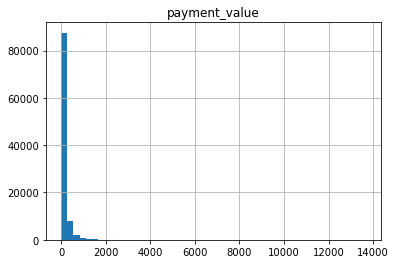

In [112]:
valor_dos_pedidos.hist(bins=50)

In [113]:
valor_dos_pedidos.describe()

,payment_value
count,99440.000000
mean,160.990267
std,221.951257
min,0.000000
25%,62.010000
50%,105.290000
75%,176.970000
max,13664.080000


array([[<AxesSubplot:title={'center':'payment_value'}>]], dtype=object)

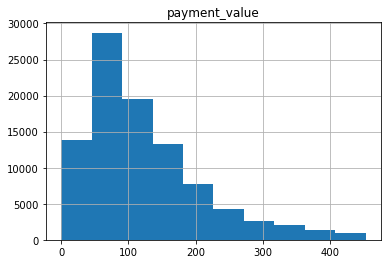

In [114]:
valor_dos_pedidos[valor_dos_pedidos.payment_value <= valor_dos_pedidos.payment_value.quantile(.95)].hist()

array([[<AxesSubplot:title={'center':'payment_value'}>]], dtype=object)

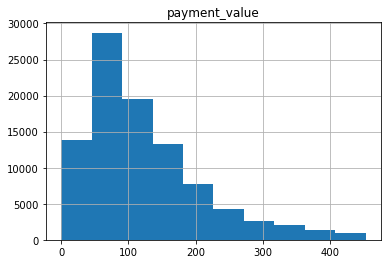

In [115]:
valor_dos_pedidos['percentil'] = pd.qcut(valor_dos_pedidos.payment_value, q=100, labels=range(100))
valor_dos_pedidos[valor_dos_pedidos.percentil < 95].hist()

In [116]:
valor_dos_pedidos[valor_dos_pedidos.percentil < 95].payment_value.agg(['mean', 'skew', 'kurtosis'])

mean        123.781814
skew          1.362322
kurtosis      1.667059
Name: payment_value, dtype: float64

In [118]:
data_dos_pedidos = pd.read_csv('C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais/olist_orders_dataset.csv', 
                          index_col='order_id',
                          usecols=['order_id', 'order_purchase_timestamp'],
                          parse_dates=['order_purchase_timestamp'])\
    .query('order_purchase_timestamp >= "2018-01-01" and order_purchase_timestamp <= "2018-12-31"')
data_dos_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54011 entries, 53cdb2fc8bc7dce0b6741e2150273451 to 66dea50a8b16d9b4dee7af250b4be1a5
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  54011 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 843.9+ KB


In [119]:
data_dos_pedidos.sort_values(by='order_purchase_timestamp')

,order_purchase_timestamp
order_id,
4f6daad34df49e10c8072b33faafcb2a,2018-01-01 02:48:41
0462bad26ccfb8508951beb9ea398ae1,2018-01-01 08:37:46
fbe41a4974e4a492e085d90e5be0b3e3,2018-01-01 08:45:04
67a98eaf984ba84c596f9f5456634f20,2018-01-01 09:36:21
7d0a0773edc4bdca0ef6ab55777718a7,2018-01-01 10:24:03
...,...
392ed9afd714e3c74767d0c4d3e3f477,2018-09-29 09:13:03
616fa7d4871b87832197b2a137a115d2,2018-10-01 15:30:09
a2ac6dad85cf8af5b0afb510a240fe8c,2018-10-03 18:55:29


In [120]:
data_dos_pedidos['quarter'] = pd.cut(data_dos_pedidos.order_purchase_timestamp.dt.month, 
                                [1, 4, 7, 10, 13],
                                right=False, include_lowest=True, 
                                labels=['Q1', 'Q2', 'Q3', 'Q4'])
data_dos_pedidos = data_dos_pedidos.drop(columns=['order_purchase_timestamp'])
data_dos_pedidos

,quarter
order_id,
53cdb2fc8bc7dce0b6741e2150273451,Q3
47770eb9100c2d0c44946d9cf07ec65d,Q3
ad21c59c0840e6cb83a9ceb5573f8159,Q1
82566a660a982b15fb86e904c8d32918,Q2
5ff96c15d0b717ac6ad1f3d77225a350,Q3
...,...
c22a47117b6a87c967b0c278488110c1,Q2
c81f74e50f0496fa39716cc77cacd460,Q1
63943bddc261676b46f01ca7ac2f7bd8,Q1


In [122]:
pedido_produto = pd.read_csv('C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais/olist_order_items_dataset.csv', usecols=['order_id', 'product_id'], index_col='product_id')

In [123]:
pedido_produto

,order_id
product_id,
4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214
e5f2d52b802189ee658865ca93d83a8f,00018f77f2f0320c557190d7a144bdd3
c777355d18b72b67abbeef9df44fd0fd,000229ec398224ef6ca0657da4fc703e
7634da152a4610f1595efa32f14722fc,00024acbcdf0a6daa1e931b038114c75
ac6c3623068f30de03045865e4e10089,00042b26cf59d7ce69dfabb4e55b4fd9
...,...
4aa6014eceb682077f9dc4bffebc05b0,fffc94f6ce00a00581880bf54a75a037
32e07fd915822b0765e448c4dd74c828,fffcd46ef2263f404302a634eb57f7eb
72a30483855e2eafc67aee5dc2560482,fffce4705a9662cd70adb13d4a31832d


In [165]:
pedido_produto.index.duplicated().sum()

79699

In [166]:
categoria_do_produto = pd.read_csv('C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais/olist_products_dataset.csv', 
                                usecols=['product_id', 'product_category_name'],
                                index_col='product_id')
categoria_do_produto

,product_category_name
product_id,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
3aa071139cb16b67ca9e5dea641aaa2f,artes
96bd76ec8810374ed1b65e291975717f,esporte_lazer
cef67bcfe19066a932b7673e239eb23d,bebes
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...
a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho


In [167]:
categoria_do_produto

,product_category_name
product_id,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
3aa071139cb16b67ca9e5dea641aaa2f,artes
96bd76ec8810374ed1b65e291975717f,esporte_lazer
cef67bcfe19066a932b7673e239eb23d,bebes
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...
a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho


In [168]:
categorias_de_interesse = ['bebes', 
                           'bebidas', 
                           'brinquedos', 
                           'artigos_de_festas', 
                           'artigos_de_natal', 
                           'fashion_underwear_e_moda_praia', 
                           'malas_acessorios']

In [170]:
categoria_do_produto = pedido_produto.join(categoria_do_produto)\
    .reset_index().set_index('order_id')\
    .drop(columns=['product_id'])
categoria_do_produto

,product_category_name
order_id,
f30149f4a8882a08895b6a242aa0d612,perfumaria
f5eda0ded77c1293b04c953138c8331d,automotivo
0bf736fd0fd5169d60de3699fcbcf986,cama_mesa_banho
3aba44d8e554ab4bb8c09f6f78032ca8,utilidades_domesticas
6f0dfb5b5398b271cc6bbd9ee263530e,utilidades_domesticas
...,...
a8159270bc9cf7d54450e079ba6b7232,informatica_acessorios
beaf95465b542dea76df78b2fb86a97a,informatica_acessorios
d6c1ed12e8eeaa15e9d5c83c79598f85,informatica_acessorios


In [172]:
trimestre_categoria = data_dos_pedidos.join(categoria_do_produto)\
    .query('product_category_name in @categorias_de_interesse')\
    .sort_values(by=['product_category_name', 'quarter'])
    
trimestre_categoria

,quarter,product_category_name
order_id,,
0e24f70accd4e5573b5173a35a773e5d,Q1,artigos_de_festas
603a0efaa57d08690507c9492973822a,Q1,artigos_de_festas
660a8ca012d4806b05c2a9b705570f62,Q1,artigos_de_festas
abdc9f9aa061ebb21dc2ff3e37000ea2,Q1,artigos_de_festas
b080474e9c0057bcc274eb9e087aaa09,Q1,artigos_de_festas
...,...,...
f025be07a93a64e2f8fa6c84849f4d48,Q3,malas_acessorios
f08e7cbe4ee33176122952f10c7128b6,Q3,malas_acessorios
f08e7cbe4ee33176122952f10c7128b6,Q3,malas_acessorios


In [173]:
pd.crosstab(columns=trimestre_categoria.quarter,
            index=trimestre_categoria.product_category_name,
            normalize='index',
            margins=True).mul(100).round(1)

quarter,Q1,Q2,Q3
product_category_name,,,
artigos_de_festas,25.0,25.0,50.0
artigos_de_natal,51.1,27.8,21.1
bebes,35.1,40.2,24.7
bebidas,36.6,47.0,16.4
brinquedos,36.6,41.5,21.9
fashion_underwear_e_moda_praia,46.5,44.2,9.3
malas_acessorios,47.0,28.7,24.3
All,37.5,39.4,23.1


In [175]:
quando_pedido_foi_realizado = pd.read_csv('C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais/olist_orders_dataset.csv', 
                          index_col='order_id',
                          usecols=['order_id', 'order_purchase_timestamp'],
                          parse_dates=['order_purchase_timestamp'])\
    .query('order_purchase_timestamp >= "2018-01-01" and order_purchase_timestamp <= "2018-12-31"')
quando_pedido_foi_realizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54011 entries, 53cdb2fc8bc7dce0b6741e2150273451 to 66dea50a8b16d9b4dee7af250b4be1a5
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_purchase_timestamp  54011 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 843.9+ KB


In [176]:
quando_pedido_foi_realizado.sort_values(by='order_purchase_timestamp')

,order_purchase_timestamp
order_id,
4f6daad34df49e10c8072b33faafcb2a,2018-01-01 02:48:41
0462bad26ccfb8508951beb9ea398ae1,2018-01-01 08:37:46
fbe41a4974e4a492e085d90e5be0b3e3,2018-01-01 08:45:04
67a98eaf984ba84c596f9f5456634f20,2018-01-01 09:36:21
7d0a0773edc4bdca0ef6ab55777718a7,2018-01-01 10:24:03
...,...
392ed9afd714e3c74767d0c4d3e3f477,2018-09-29 09:13:03
616fa7d4871b87832197b2a137a115d2,2018-10-01 15:30:09
a2ac6dad85cf8af5b0afb510a240fe8c,2018-10-03 18:55:29


In [180]:
quando_pedido_foi_realizado['meses'] = quando_pedido_foi_realizado.order_purchase_timestamp.dt.month
                    
quando_pedido_foi_realizado

,order_purchase_timestamp,meses
order_id,,
53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,7
47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,8
ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2
82566a660a982b15fb86e904c8d32918,2018-06-07 10:06:19,6
5ff96c15d0b717ac6ad1f3d77225a350,2018-07-25 17:44:10,7
...,...,...
c22a47117b6a87c967b0c278488110c1,2018-06-22 20:53:29,6
c81f74e50f0496fa39716cc77cacd460,2018-03-04 22:48:38,3
63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2


In [182]:
meses_Categoria = quando_pedido_foi_realizado.join(categoria_do_produto)\
    .query('product_category_name in @categorias_de_interesse')\
    .sort_values(by=['product_category_name', 'meses'])
    
meses_Categoria

,order_purchase_timestamp,meses,product_category_name
order_id,,,
0e24f70accd4e5573b5173a35a773e5d,2018-01-28 14:09:10,1,artigos_de_festas
b080474e9c0057bcc274eb9e087aaa09,2018-01-15 23:58:47,1,artigos_de_festas
603a0efaa57d08690507c9492973822a,2018-03-04 21:56:16,3,artigos_de_festas
660a8ca012d4806b05c2a9b705570f62,2018-03-29 10:25:37,3,artigos_de_festas
abdc9f9aa061ebb21dc2ff3e37000ea2,2018-03-02 15:27:34,3,artigos_de_festas
...,...,...,...
dd76a5f4fd89348d27741160d6025fc8,2018-08-08 15:21:54,8,malas_acessorios
e5bf502cf18eaf816a5cb7d036dd46c4,2018-08-01 23:45:37,8,malas_acessorios
e8ddd60abf2ceeee18ebd986311f3630,2018-08-27 11:57:38,8,malas_acessorios


In [183]:
pd.crosstab(columns=meses_Categoria.meses,
            index=meses_Categoria.product_category_name,
            normalize='index',
            margins=True).mul(100).round(1)

meses,1,2,3,4,5,6,7,8
product_category_name,,,,,,,,
artigos_de_festas,6.2,0.0,18.8,6.2,12.5,6.2,6.2,43.8
artigos_de_natal,11.1,26.7,13.3,13.3,6.7,7.8,8.9,12.2
bebes,12.6,9.9,12.6,13.7,13.8,12.7,12.5,12.2
bebidas,18.1,11.1,7.3,18.8,16.7,11.5,5.9,10.5
brinquedos,11.1,9.8,15.7,13.8,14.9,12.8,10.5,11.4
fashion_underwear_e_moda_praia,18.6,16.3,11.6,14.0,14.0,16.3,4.7,4.7
malas_acessorios,25.9,9.5,11.5,11.5,9.9,7.3,10.9,13.4
All,14.0,10.3,13.3,13.8,13.8,11.9,11.0,12.1


In [184]:
quando_pedido_foi_realizado

,order_purchase_timestamp,meses
order_id,,
53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,7
47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,8
ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2
82566a660a982b15fb86e904c8d32918,2018-06-07 10:06:19,6
5ff96c15d0b717ac6ad1f3d77225a350,2018-07-25 17:44:10,7
...,...,...
c22a47117b6a87c967b0c278488110c1,2018-06-22 20:53:29,6
c81f74e50f0496fa39716cc77cacd460,2018-03-04 22:48:38,3
63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2


In [192]:
meses_mais_vendas_por_categoria = quando_pedido_foi_realizado.join(categoria_do_produto)\
    .query('product_category_name in @categorias_de_interesse')\
    .sort_values(by=['product_category_name', 'meses'])
    
meses_mais_vendas_por_categoria

,order_purchase_timestamp,meses,product_category_name
order_id,,,
0e24f70accd4e5573b5173a35a773e5d,2018-01-28 14:09:10,1,artigos_de_festas
b080474e9c0057bcc274eb9e087aaa09,2018-01-15 23:58:47,1,artigos_de_festas
603a0efaa57d08690507c9492973822a,2018-03-04 21:56:16,3,artigos_de_festas
660a8ca012d4806b05c2a9b705570f62,2018-03-29 10:25:37,3,artigos_de_festas
abdc9f9aa061ebb21dc2ff3e37000ea2,2018-03-02 15:27:34,3,artigos_de_festas
...,...,...,...
dd76a5f4fd89348d27741160d6025fc8,2018-08-08 15:21:54,8,malas_acessorios
e5bf502cf18eaf816a5cb7d036dd46c4,2018-08-01 23:45:37,8,malas_acessorios
e8ddd60abf2ceeee18ebd986311f3630,2018-08-27 11:57:38,8,malas_acessorios


In [201]:
quando_pedido_foi_realizado.value_counts('order_id')

order_id
000229ec398224ef6ca0657da4fc703e    1
aab7b04f45546e03e7c86b9e8f12368e    1
aaa2176c2eedbba6fb84a3d63e01f433    1
aaa3852a53f716761fff6b45173f223e    1
aaa4688b6d2e4d20b2ffc6d97723ea63    1
                                   ..
55241c40e4d2ee72be056dc4d17acc5b    1
5525404ad9f5043e1164e6833b2c24ca    1
5525ea8ee9e6150faa9b41dfc4024552    1
5528ba50898b536ac11c799ba9eef5ac    1
fffe41c64501cc87c801fd61db3f6244    1
Length: 54011, dtype: int64

In [206]:
ids_meses = quando_pedido_foi_realizado['meses'].value_counts(('order_id'))

In [207]:
ids_meses

1     0.134584
3     0.133510
4     0.128474
5     0.127252
2     0.124567
8     0.120568
7     0.116495
6     0.114180
9     0.000296
10    0.000074
Name: meses, dtype: float64

In [209]:
ids_meses.head(3)

1    0.134584
3    0.133510
4    0.128474
Name: meses, dtype: float64

In [244]:
df_payments = pd.read_csv("C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais/olist_order_payments_dataset.csv", usecols = ["order_id","payment_type", "payment_value"])

In [213]:
df_orders = pd.read_csv("C://Users/ACER/Documents/CURSOS/Formação Cientista de Dados/dados_totais/olist_orders_dataset.csv", usecols = ["order_id","order_status"])

In [214]:
pd.crosstab(index=df_orders['order_status'],
            columns=df_payments['payment_type'],
            values=df_payments['payment_value'],
            aggfunc='mean')

payment_type,boleto,credit_card,debit_card,not_defined,voucher
order_status,,,,,
approved,73.270000,203.860000,NaN,NaN,NaN
canceled,136.399027,172.165992,136.942857,NaN,37.878846
created,630.090000,163.793333,NaN,NaN,50.000000
delivered,145.797258,163.204068,143.604626,0.0,65.973836
invoiced,141.004203,161.555392,64.452500,NaN,59.113333
processing,120.281186,172.790594,93.886000,NaN,58.665000
shipped,146.805808,175.166845,83.248333,0.0,52.407679
unavailable,130.276615,160.781558,183.395000,NaN,75.550976


In [245]:
df_payments

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45
...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,363.31
103882,7b905861d7c825891d6347454ea7863f,credit_card,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,47.77
103884,b8b61059626efa996a60be9bb9320e10,credit_card,369.54


In [246]:
df_payments["rank"] = df_payments.groupby("order_id")["payment_value"].rank("dense", ascending=False)

In [247]:
df_payments

,order_id,payment_type,payment_value,rank
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33,1.0
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39,1.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71,1.0
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78,1.0
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45,1.0
...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,363.31,1.0
103882,7b905861d7c825891d6347454ea7863f,credit_card,96.80,1.0
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,47.77,1.0
103884,b8b61059626efa996a60be9bb9320e10,credit_card,369.54,1.0


In [248]:
import numpy as np

In [249]:
import matplotlib.pyplot as plt

In [250]:
import seaborn as sns

array([[<AxesSubplot:title={'center':'payment_value'}>,
        <AxesSubplot:title={'center':'rank'}>]], dtype=object)

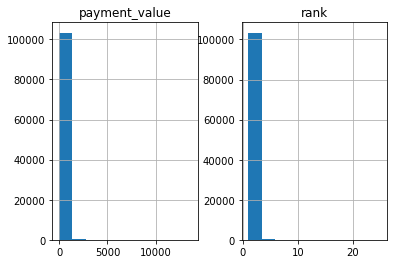

In [252]:
df_payments.hist()

array([[<AxesSubplot:title={'center':'payment_value'}>,
        <AxesSubplot:title={'center':'rank'}>]], dtype=object)

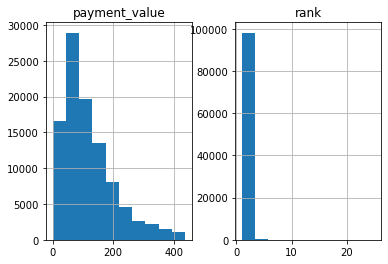

In [253]:
df_payments[df_payments.payment_value <= df_payments.payment_value.quantile(.95)].hist()

In [254]:
df_meio_pgto_situacao = pd.crosstab(index=df_orders.order_status,
            columns=df_payments.payment_type,
            values=df_payments.payment_value,
            aggfunc='count')
df_meio_pgto_situacao

payment_type,boleto,credit_card,debit_card,not_defined,voucher
order_status,,,,,
approved,1.0,1.0,NaN,NaN,NaN
canceled,113.0,479.0,7.0,NaN,26.0
created,1.0,3.0,NaN,NaN,1.0
delivered,18358.0,71337.0,1429.0,2.0,5352.0
invoiced,69.0,217.0,4.0,NaN,24.0
processing,59.0,219.0,5.0,NaN,18.0
shipped,198.0,840.0,12.0,1.0,56.0
unavailable,130.0,430.0,8.0,NaN,41.0


In [255]:
valor_dos_pedidos = payments.groupby('order_id')[['payment_value']].sum()
valor_dos_pedidos

,payment_value
order_id,
00010242fe8c5a6d1ba2dd792cb16214,72.19
00018f77f2f0320c557190d7a144bdd3,259.83
000229ec398224ef6ca0657da4fc703e,216.87
00024acbcdf0a6daa1e931b038114c75,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...
fffc94f6ce00a00581880bf54a75a037,343.40
fffcd46ef2263f404302a634eb57f7eb,386.53
fffce4705a9662cd70adb13d4a31832d,116.85


array([[<AxesSubplot:title={'center':'payment_value'}>]], dtype=object)

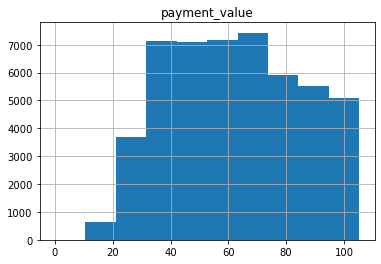

In [256]:
valor_dos_pedidos['percentil'] = pd.qcut(valor_dos_pedidos.payment_value, q=100, labels=range(100))
valor_dos_pedidos[valor_dos_pedidos.percentil < 50].hist()

In [257]:
valor_dos_pedidos[valor_dos_pedidos.percentil < 95].payment_value.agg(['mean', 'skew', 'kurtosis'])

mean        123.781814
skew          1.362322
kurtosis      1.667059
Name: payment_value, dtype: float64